In [1]:
#imports required for the project
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from PIL import Image 

In [2]:
#Storing the path of dataset to a string variable 
train_data = "C:/Users/Ashwanth/xray_dataset_covid19/train"
train_data

'C:/Users/Ashwanth/xray_dataset_covid19/train'

In [3]:
#Loading the actual train dataset into python environment
train_normal = os.listdir("C:/Users/Ashwanth/xray_dataset_covid19/train/NORMAL/")
train_pneumonia = os.listdir("C:/Users/Ashwanth/xray_dataset_covid19/train/PNEUMONIA/")

In [4]:
#TChecking whether the data is loaded or not
print(train_normal)

['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0011-0001.jpeg', 'IM-0013-0001.jpeg', 'IM-0015-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0017-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0021-0001.jpeg', 'IM-0022-0001.jpeg', 'IM-0023-0001.jpeg', 'IM-0025-0001.jpeg', 'IM-0027-0001.jpeg', 'IM-0029-0001.jpeg', 'IM-0030-0001.jpeg', 'IM-0031-0001.jpeg', 'IM-0033-0001-0001.jpeg', 'IM-0033-0001-0002.jpeg', 'IM-0033-0001.jpeg', 'IM-0035-0001.jpeg', 'IM-0036-0001.jpeg', 'IM-0037-0001.jpeg', 'IM-0039-0001.jpeg', 'IM-0041-0001.jpeg', 'IM-0043-0001.jpeg', 'IM-0045-0001.jpeg', 'IM-0046-0001.jpeg', 'IM-0049-0001.jpeg', 'IM-0050-0001.jpeg', 'IM-0059-0001.jpeg', 'IM-0061-0001.jpeg', 'IM-0063-0001.jpeg', 'IM-0069-0001.jpeg', 'IM-0070-0001.jpeg', 'IM-0071-0001.jpeg', 'IM-0073-0001.jpeg', 'IM-0075-0001.jpeg', 'IM-0077-0001.jpeg', 'IM-0079-0001.jpeg', 'IM-0081-0001

In [5]:
#Checking 
print(train_pneumonia)

['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg', '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg', '23E99E2E-447C-46E5-8EB2-D35D12473C39.png', '2C10A413-AABE-4807-8CCE-6A2025594067.jpeg', '2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg', '31BA3780-2323-493F-8AED-62081B9C383B.jpeg', '39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg', '41591_2020_819_Fig1_HTML.webp-day10.png', '41591_2020_819_Fig1_HTML.webp-day5.png', '446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg', '5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg', '5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg', '5e6dd879fde9502400e58b2f.jpeg', '6CB4EFC6-68FA-4CD5-

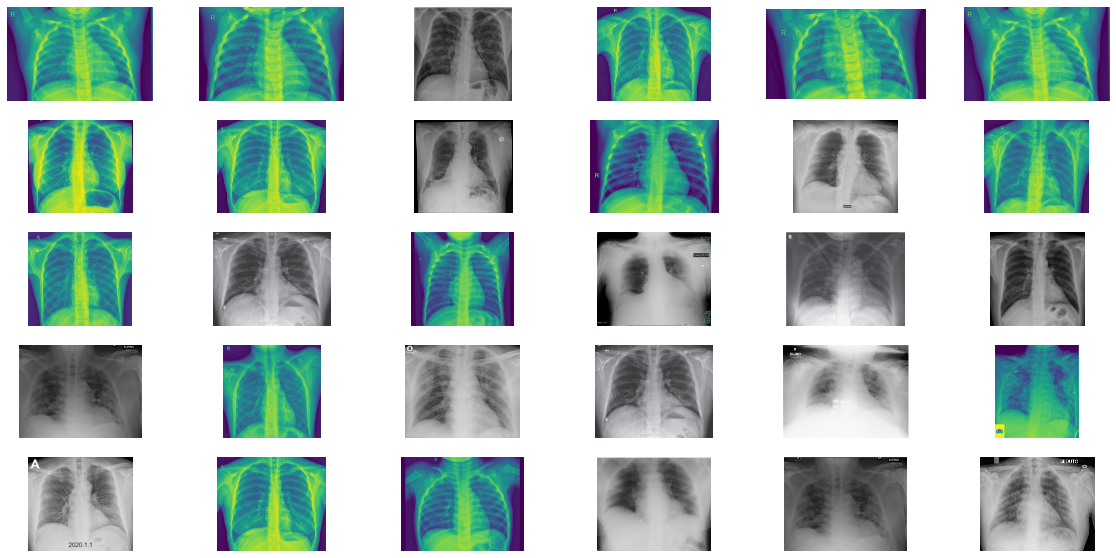

In [6]:
#Creating a block to print random images from the dataset loaded for reference
import random
from PIL import Image 

all_images = []
for folder in os.listdir(train_data):
    for image_file in os.listdir(train_data + '/' + folder):
        all_images.append(os.path.join(train_data, folder, image_file))

plt.figure(1, figsize=(20, 10))

n = 0
for i in range(30):
    n = n+1
    random_images = random.choice(all_images)
    show_images = plt.imread(random_images)
    plt.subplot(5, 6, n)
    plt.axis("off")
    plt.imshow(show_images)

plt.show()

In [7]:
import random
random = random.randint(0,len(train_normal))
One_data_norm = train_normal[random]
One_data_norm

'IM-0011-0001.jpeg'

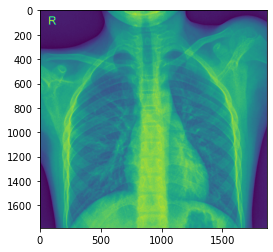

In [8]:
#Visualizing a randomly selected image from the overall dataset with normal type
img = plt.imread("C:/Users/Ashwanth/xray_dataset_covid19/train/NORMAL/"+One_data_norm)
plt.imshow(img)

In [9]:
import random
random = random.randint(0,len(train_pneumonia))
One_data_pneumonia = train_pneumonia[random]
One_data_pneumonia

'80446565-E090-4187-A031-9D3CEAA586C8.jpeg'

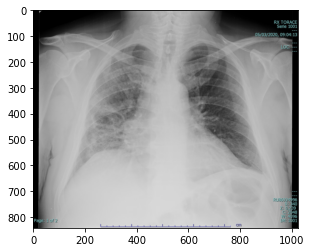

In [10]:
#Visualizing a randomly selected image from the overall dataset with pneumonia type
img = plt.imread("C:/Users/Ashwanth/xray_dataset_covid19/train/PNEUMONIA/"+One_data_pneumonia)
plt.imshow(img)

    DATA AUGMENTATION
    
    This is the process where we can flip, rotate, shear, crop, zoom our images. Using some of these techniques I have generated entirely new set of data which will be used to train our model. This is done mainly to improve our model performance.

In [11]:
train_dir = "C:/Users/Ashwanth/xray_dataset_covid19/train"
test_dir = "C:/Users/Ashwanth/xray_dataset_covid19/test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Applying data augementation to make a new dataset from the existing one

train_datagen = ImageDataGenerator(rescale=1/255., height_shift_range=0.4,
                                   width_shift_range=0.4,rotation_range=40,
                                   fill_mode='nearest',horizontal_flip=True,
                                   zoom_range=0.4
                                   )

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20,
                                                    class_mode = 'categorical', shuffle=True
                                                    )

val_datagen = ImageDataGenerator(rescale=1/255.)

validation_creator = val_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=16,\
                                                     class_mode='categorical', shuffle=False)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
import datetime
#Call-back

def create_tensorboard_callback(directory_name, model_name):
    
#Creating tensorboard callback instance for generating log files.
  
    log_directory = directory_name + "/" + model_name + "/" + datetime.datetime.now().strftime("%y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_directory)
    print(f"storing the log files to : {log_directory}")
    return tensorboard_callback

#a checkpoint to store the model's progress in log files
checkpoint = "model_checkpoints/cp.ckpt"
model_cp = tf.keras.callbacks.ModelCheckpoint(checkpoint, 
                                                      monitor = 'val_accuracy',#Model with better validation accuracy is stored 
                                                      save_best_only = True, #storing the best weights alone
                                                      save_weight_only = True )

# creating early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

<h1>TRANSFER LEARNING USING VGG16 MODEL<h1>

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# creating a base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.VGG16(include_top=False)
base_model.trainable = False 

# creating a functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training = False) #Freezing the layers so that it will be used only for inference
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_VGG16 = tf.keras.Model(inputs, outputs)

#Compiling the model 
model_VGG16.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

C:\Users\Ashwanth\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
model_VGG16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flattening_layer (Flatten)   (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________

In [15]:
model_VGG16.layers

In [16]:
# checking layer "dtype policies"
for layer in model_VGG16.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
vgg16 False float32 <Policy "float32">
flattening_layer True float32 <Policy "float32">
dense True float32 <Policy "float32">
dropout True float32 <Policy "float32">
dense_1 True float32 <Policy "float32">


In [17]:
# we can also check the layers dtype policies for our base model too
for layer in base_model.layers:
    print(layer.name, layer.trainable, layer.dtype_policy)

input_1 False <Policy "float32">
block1_conv1 False <Policy "float32">
block1_conv2 False <Policy "float32">
block1_pool False <Policy "float32">
block2_conv1 False <Policy "float32">
block2_conv2 False <Policy "float32">
block2_pool False <Policy "float32">
block3_conv1 False <Policy "float32">
block3_conv2 False <Policy "float32">
block3_conv3 False <Policy "float32">
block3_pool False <Policy "float32">
block4_conv1 False <Policy "float32">
block4_conv2 False <Policy "float32">
block4_conv3 False <Policy "float32">
block4_pool False <Policy "float32">
block5_conv1 False <Policy "float32">
block5_conv2 False <Policy "float32">
block5_conv3 False <Policy "float32">
block5_pool False <Policy "float32">


In [18]:
# let's train our model on our training data
history_VGG16 = model_VGG16.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator, validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "VGG16"), 
                                 model_cp, early_stopping_callback ])

storing the log files to : training_logs/VGG16/211207-235603
Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 1.6280 - accuracy: 0.5405 - precision: 0.5655 - recall: 0.5541 - val_loss: 0.9692 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000
INFO:tensorflow:Assets written to: model_checkpoints\cp.ckpt\assets
Epoch 2/5
8/8 [==============================] - 13s 2s/step - loss: 0.9628 - accuracy: 0.5878 - precision: 0.5894 - recall: 0.6014 - val_loss: 0.1970 - val_accuracy: 0.9250 - val_precision: 0.9487 - val_recall: 0.9250
INFO:tensorflow:Assets written to: model_checkpoints\cp.ckpt\assets
Epoch 3/5
8/8 [==============================] - 13s 2s/step - loss: 0.5871 - accuracy: 0.7568 - precision: 0.7292 - recall: 0.7095 - val_loss: 0.2261 - val_accuracy: 0.9750 - val_precision: 0.9512 - val_recall: 0.9750
INFO:tensorflow:Assets written to: model_checkpoints\cp.ckpt\assets
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.4921 - 

In [19]:
def show_loss_acc(history):
 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

  # plot loss curve
    plt.plot(epochs, loss, label='Train loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()

  # plot accuracy curve
    plt.figure()
    plt.plot(epochs, accuracy, label='Train Accuracy')
    plt.plot(epochs, val_accuracy, label='Valiation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

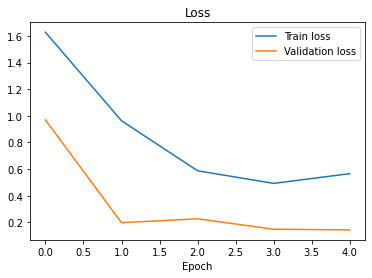

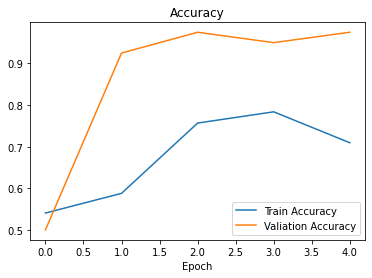

In [20]:
show_loss_acc(history_VGG16)

In [21]:
pred_prob = model_VGG16.predict(validation_creator)
pred_prob

array([[0.6089184 , 0.1401478 ],
       [0.50887674, 0.33991504],
       [0.6161096 , 0.13599408],
       [0.57487774, 0.20767939],
       [0.6195477 , 0.20545769],
       [0.4490282 , 0.3791325 ],
       [0.64541304, 0.13270843],
       [0.62591696, 0.15823874],
       [0.6018466 , 0.12833476],
       [0.6355769 , 0.17766994],
       [0.67125285, 0.13296413],
       [0.59297067, 0.22285527],
       [0.6039902 , 0.18306932],
       [0.6007618 , 0.19348544],
       [0.66867965, 0.09941447],
       [0.68744683, 0.08760729],
       [0.61784744, 0.16037494],
       [0.63950807, 0.13406721],
       [0.65481365, 0.1613025 ],
       [0.4718227 , 0.35797414],
       [0.08462396, 0.9230871 ],
       [0.07770479, 0.905457  ],
       [0.09364703, 0.8946941 ],
       [0.44254252, 0.37223917],
       [0.36113173, 0.5338063 ],
       [0.28863865, 0.6341064 ],
       [0.07172972, 0.94403386],
       [0.19015661, 0.7836244 ],
       [0.08578295, 0.91108483],
       [0.05521452, 0.95180964],
       [0.

In [22]:
y_pred_VGG16 = tf.argmax(pred_prob, axis=1)
y_pred_VGG16

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [23]:
true_label = validation_creator.classes
true_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
def metrics_calc(y_true, y_pred):
    accuracy = tf.keras.metrics.BinaryAccuracy(name = 'binary_accuracy', threshold=0.5)
    accuracy.update_state(y_true, y_pred)
    acc = accuracy.result().numpy()
    precision = tf.keras.metrics.Precision()
    precision.update_state(y_true, y_pred)
    prec = precision.result().numpy()
    recall = tf.keras.metrics.Recall()
    recall.update_state(y_true, y_pred)
    rec = recall.result().numpy()

    dict = {
      'accuracy': acc,
      'precision': prec,
      'recall': rec
    }
    return dict


In [25]:
model_VGG16_param = metrics_calc(true_label, y_pred_VGG16)
model_VGG16_param

{'accuracy': 0.975, 'precision': 1.0, 'recall': 0.95}

In [26]:
model_VGG16.evaluate(validation_creator)

3/3 [==============================] - 2s 667ms/step - loss: 0.1426 - accuracy: 0.9750 - precision: 1.0000 - recall: 0.9000


[0.14263853430747986, 0.9750000238418579, 1.0, 0.8999999761581421]

In [27]:
import cv2
import numpy as np

In [28]:
class_names =  list(train_generator.class_indices)
class_names

['NORMAL', 'PNEUMONIA']

In [29]:
# Custom prediction for a single dataset taken into consideration - VGG16 model
def custom_prediction_VGG16(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_VGG16.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

In [30]:
test_pneumonia = os.listdir("C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/")

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
Actual shape of X-ray taken: (1570, 1695, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[1.000000e+00 7.055214e-28]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  NORMAL


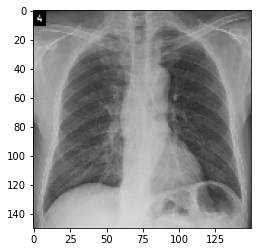

In [31]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_VGG16(filepath)

In [32]:
#Utilizing the scikitplot 
import scikitplot as skplt
def confusion_matrix(y_true, y_pred):
    skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize = (12,9), cmap = plt.cm.Greens)

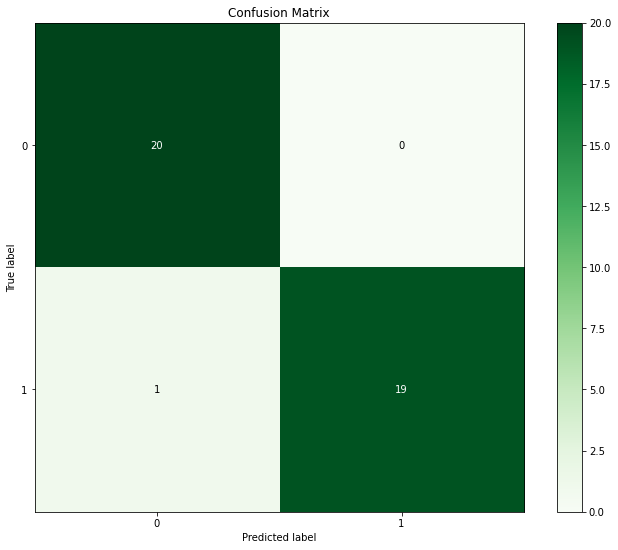

In [33]:
confusion_matrix(true_label, y_pred_VGG16)

<h1>CNN MODEL<h1>

In [34]:
# we will use the sequential API here

model_CNN = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    # let the results from previous layers be fed into a dense model after flattening
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
    ], name = 'model_CNN'
)

# let's compile model 2

model_CNN.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

C:\Users\Ashwanth\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [35]:
history_CNN = model_CNN.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator,
                      validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "CNN_with_custom_layer"), 
                                 model_cp, early_stopping_callback ])

storing the log files to : training_logs/CNN_with_custom_layer/211207-235718
Epoch 1/10
8/8 [==============================] - 6s 739ms/step - loss: 0.7617 - accuracy: 0.5473 - val_loss: 0.6855 - val_accuracy: 0.8000
Epoch 2/10
8/8 [==============================] - 5s 665ms/step - loss: 0.6922 - accuracy: 0.5338 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 5s 656ms/step - loss: 0.6887 - accuracy: 0.5743 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 5s 678ms/step - loss: 0.6912 - accuracy: 0.5473 - val_loss: 0.6240 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 5s 627ms/step - loss: 0.6897 - accuracy: 0.5676 - val_loss: 0.5656 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 5s 636ms/step - loss: 0.6569 - accuracy: 0.6892 - val_loss: 0.4940 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 5s 686ms/step - loss: 0.6541 - ac

In [36]:
model_CNN.summary()

Model: "model_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18

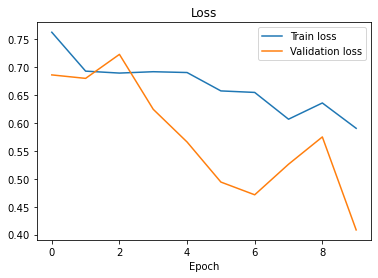

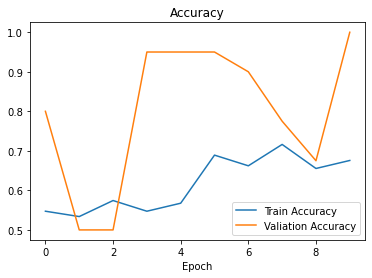

In [37]:
# let us check how the loss and accuracy curves looks when visualized
show_loss_acc(history_CNN)

In [38]:
y_pred_CNN = model_CNN.predict(validation_creator)
y_pred_CNN = tf.argmax(y_pred_CNN, axis=1)
y_pred_CNN

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [39]:
# The metrics for model CNN is evaluated by the following code
model_CNN_param = metrics_calc(true_label, y_pred_CNN)
model_CNN_param

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

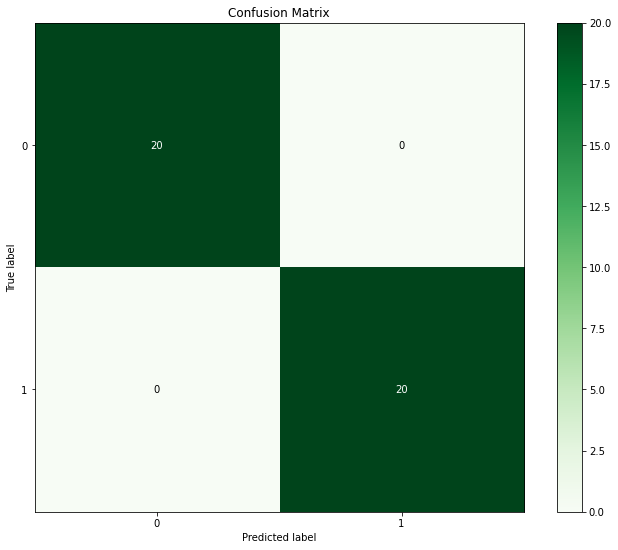

In [40]:
#Visualizing the results in the form of Confusion matrix 
confusion_matrix(true_label, y_pred_CNN)

In [41]:

model_CNN.evaluate(validation_creator)

3/3 [==============================] - 1s 265ms/step - loss: 0.4085 - accuracy: 1.0000


[0.4084588587284088, 1.0]

In [42]:
# Custom prediction for a single dataset taken into consideration - CNN model
def custom_prediction_CNN(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_CNN.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/test1.jpg
Actual shape of X-ray taken: (1517, 1534, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[1.000000e+00 1.050315e-10]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  NORMAL


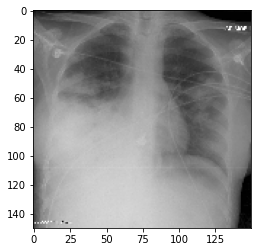

In [43]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_CNN(filepath)

<h1>TRANSFER LEARNING WITH FEATURE EXTRACTION USING NasNetLarge MODEL<h1>

In [44]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.DenseNet201(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_NNL = tf.keras.Model(inputs, outputs)

# let's compile the model
model_NNL.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

C:\Users\Ashwanth\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [45]:
history_NNL = model_NNL.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator,
                      validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "DenseNet201"), 
                                 model_cp, early_stopping_callback ])

storing the log files to : training_logs/DenseNet201/211207-235819
Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 44.2337 - accuracy: 0.5743 - val_loss: 10.8614 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 6.5593 - accuracy: 0.7635 - val_loss: 0.0516 - val_accuracy: 0.9750
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 2.3331 - accuracy: 0.8784 - val_loss: 0.1003 - val_accuracy: 0.9750
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 1.5818 - accuracy: 0.9189 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 4.7495 - accuracy: 0.8378 - val_loss: 0.3892 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 4.8010 - accuracy: 0.8108 - val_loss: 0.3464 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 4.8307 - accuracy: 0.8311 - val_l

In [46]:
model_NNL.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
densenet201 (Functional)     (None, None, None, 1920)  18321984  
_________________________________________________________________
flattening_layer (Flatten)   (None, 30720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               15729152  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 34,052,162
Trainable params: 15,730,178
Non-trainable params: 18,321,984
______________________________________

In [47]:
pred_prob = model_NNL.predict(validation_creator)
pred_prob[:10]

array([[1.00000000e+00, 1.19860804e-28],
       [1.00000000e+00, 9.60350098e-06],
       [1.00000000e+00, 3.51633254e-17],
       [1.00000000e+00, 7.19401726e-07],
       [1.00000000e+00, 4.23184682e-11],
       [1.00000000e+00, 1.25625532e-09],
       [1.00000000e+00, 2.24188255e-11],
       [1.00000000e+00, 9.21763785e-06],
       [1.00000000e+00, 1.00694485e-28],
       [1.00000000e+00, 1.30424185e-10]], dtype=float32)

In [48]:
y_pred_NNL = tf.argmax(pred_prob, axis=1)
y_pred_NNL

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [49]:
model_NNL_parameters = metrics_calc(true_label, y_pred_NNL)
model_NNL_parameters

{'accuracy': 0.975, 'precision': 1.0, 'recall': 0.95}

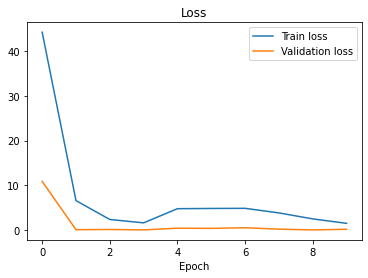

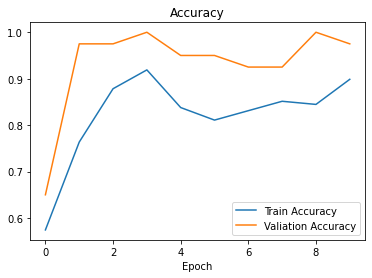

In [50]:
# let us look into loss and accuracy curve for this model
show_loss_acc(history_NNL)

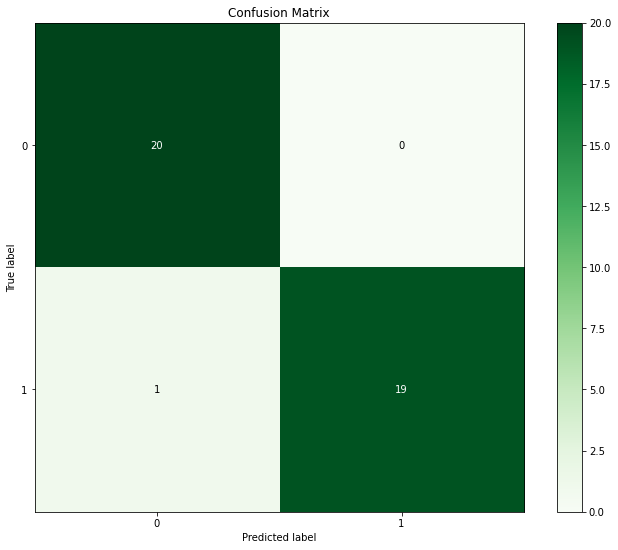

In [51]:
confusion_matrix(true_label, y_pred_NNL)

In [52]:
# Custom prediction for a single dataset taken into consideration - DenseNet
def custom_prediction_NNL(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_NNL.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg
Actual shape of X-ray taken: (1517, 1534, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[0.05512705 0.9999988 ]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  PNEUMONIA


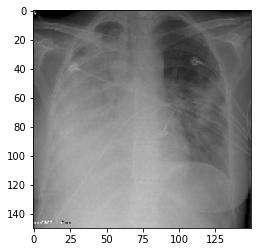

In [53]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_NNL(filepath)

<h1>TRANSFER LEARNING WITH FEATURE EXTRACTION USING MobileNet MODEL<h1>

In [54]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.MobileNet(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_MN = tf.keras.Model(inputs, outputs)

# let's compile the model
model_MN.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])


In [55]:
history_MN = model_MN.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator,
                      validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "MobileNet"), model_cp, 
                                 early_stopping_callback ])

storing the log files to : training_logs/MobileNet/211208-000029
Epoch 1/10
8/8 [==============================] - 8s 905ms/step - loss: 37.8205 - accuracy: 0.6216 - val_loss: 16.5379 - val_accuracy: 0.5750
Epoch 2/10
8/8 [==============================] - 6s 749ms/step - loss: 4.5229 - accuracy: 0.8446 - val_loss: 0.3958 - val_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 6s 736ms/step - loss: 5.1964 - accuracy: 0.7500 - val_loss: 0.8764 - val_accuracy: 0.9250
Epoch 4/10
8/8 [==============================] - 6s 734ms/step - loss: 3.6295 - accuracy: 0.8581 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 6s 737ms/step - loss: 0.8383 - accuracy: 0.8919 - val_loss: 4.0620 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 6s 683ms/step - loss: 2.5945 - accuracy: 0.8581 - val_loss: 0.3867 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 6s 712ms/step - loss: 1.0682 - accuracy: 0.

In [56]:
model_MN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
flattening_layer (Flatten)   (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 11,619,010
Trainable params: 8,390,146
Non-trainable params: 3,228,864
________________________________________

In [57]:
pred_prob = model_MN.predict(validation_creator)

In [58]:
y_pred_MN = tf.argmax(pred_prob, axis=1)
y_pred_MN

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [59]:
model_MN_parameters = metrics_calc(true_label, y_pred_MN)
model_MN_parameters

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

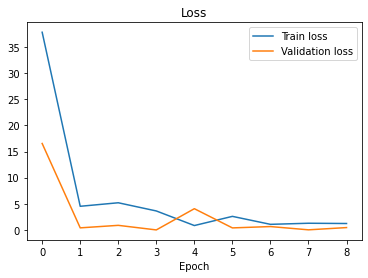

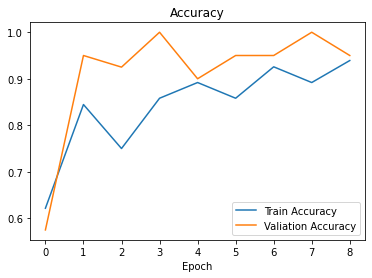

In [60]:
# let us check how the loss and accuracy curves looks when visualized
show_loss_acc(history_MN)

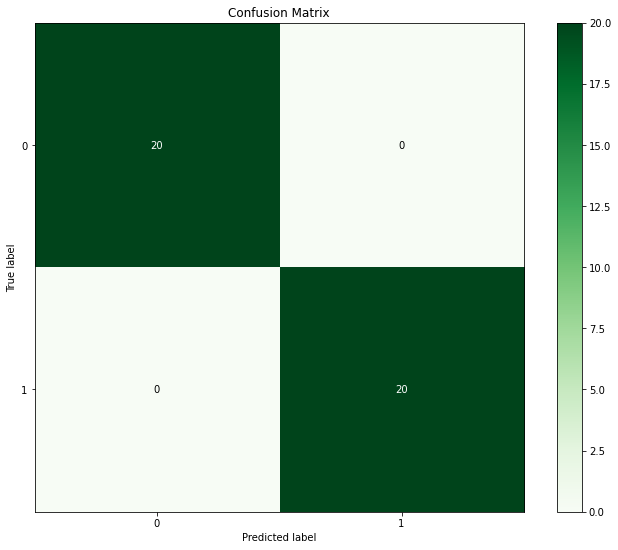

In [61]:
confusion_matrix(true_label, y_pred_MN)

In [62]:
# Custom prediction for a single dataset taken into consideration - MobileNet
def custom_prediction_MN(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_MN.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
Actual shape of X-ray taken: (1517, 1534, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[0.00137925 0.9999551 ]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  PNEUMONIA


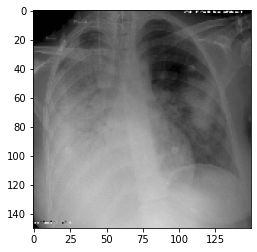

In [63]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_MN(filepath)

<h1>TRANSFER LEARNING WITH FEATURE EXTRACTION USING InceptionResNetV2 MODEL<h1>

In [64]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.InceptionResNetV2(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_IRN = tf.keras.Model(inputs, outputs)

# let's compile the model
model_IRN.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [65]:
history_IRN = model_IRN.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                            validation_data = validation_creator, validation_steps = len(validation_creator),
                            callbacks=[create_tensorboard_callback("training_logs", "InceptionResNetV2"), model_cp,
                                       early_stopping_callback ])

storing the log files to : training_logs/InceptionResNetV2/211208-000129
Epoch 1/10
8/8 [==============================] - 16s 1s/step - loss: 67.9846 - accuracy: 0.5068 - val_loss: 6.7822 - val_accuracy: 0.6250
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 11.8410 - accuracy: 0.6824 - val_loss: 15.3156 - val_accuracy: 0.5750
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 6.9841 - accuracy: 0.7432 - val_loss: 6.0453 - val_accuracy: 0.8750
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 8.7353 - accuracy: 0.7027 - val_loss: 0.8386 - val_accuracy: 0.9250
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 3.2275 - accuracy: 0.8311 - val_loss: 0.8546 - val_accuracy: 0.9250
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 5.7539 - accuracy: 0.8176 - val_loss: 2.2280 - val_accuracy: 0.9000
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 2.8860 - accuracy: 0.8311 - val

In [66]:
model_IRN.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
flattening_layer (Flatten)   (None, 13824)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               7078400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 61,416,162
Trainable params: 7,079,426
Non-trainable params: 54,336,736
_______________________________________

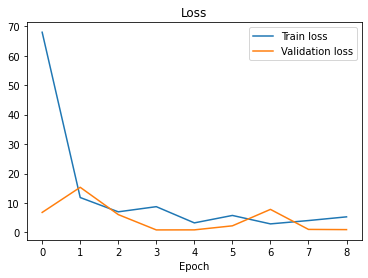

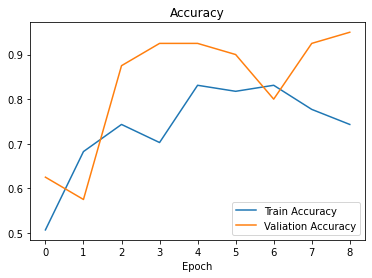

In [67]:
show_loss_acc(history_IRN)

In [68]:
model_IRN.evaluate(validation_creator)

3/3 [==============================] - 2s 465ms/step - loss: 0.8386 - accuracy: 0.9250


[0.838597297668457, 0.925000011920929]

In [69]:
pred_prob = model_IRN.predict(validation_creator)
pred_prob[:10]

array([[1.        , 0.9999933 ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 0.99999976]], dtype=float32)

In [70]:
y_pred_IRN = tf.argmax(pred_prob, axis=1)
y_pred_IRN

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)>

In [71]:
model_IRN_parameters = metrics_calc(true_label, y_pred_IRN)
model_IRN_parameters

{'accuracy': 0.85, 'precision': 1.0, 'recall': 0.7}

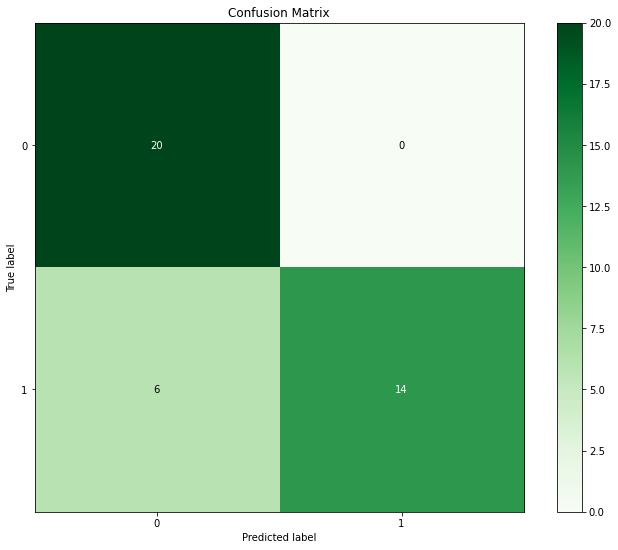

In [72]:
confusion_matrix(true_label, y_pred_IRN)

In [73]:
def custom_prediction_IRN(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_IRN.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
Actual shape of X-ray taken: (1710, 1708, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[1. 1.]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  NORMAL


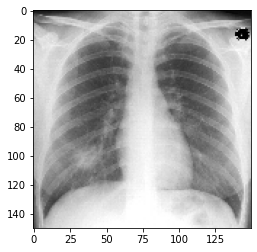

In [74]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_IRN(filepath)

<h1>TRANSFER LEARNING WITH FEATURE EXTRACTION USING Xception MODEL<h1>

In [75]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# create base model
input_shape = (150,150,3)
base_model = tf.keras.applications.Xception(include_top=False)
base_model.trainable = False # we will freeze the base model layers

# create functional model
inputs = layers.Input(shape=input_shape, name='input_layer')
x = base_model(inputs, training=False) # setting base model to inference mode 
x = layers.Flatten(name='flattening_layer')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_X = tf.keras.Model(inputs, outputs)

# let's compile the model
model_X.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [76]:
history_X = model_X.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator,
                      validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "Xception"), model_cp, 
                                 early_stopping_callback ])

storing the log files to : training_logs/Xception/211208-000312


C:\Users\Ashwanth\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 44.2169 - accuracy: 0.5946 - val_loss: 3.8595 - val_accuracy: 0.9000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 7.1175 - accuracy: 0.7905 - val_loss: 7.6142 - val_accuracy: 0.7750
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 4.3376 - accuracy: 0.7770 - val_loss: 0.1006 - val_accuracy: 0.9750
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 2.9380 - accuracy: 0.8243 - val_loss: 0.6439 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 3.2761 - accuracy: 0.8176 - val_loss: 3.0235 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 2.7895 - accuracy: 0.8514 - val_loss: 2.4006 - val_accuracy: 0.7500
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 2.1671 - accuracy: 0.7973 - val_loss: 1.6116 - val_accuracy: 0.8750
Epoch 8/10
8/8 [=====================

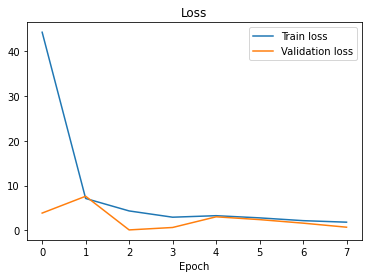

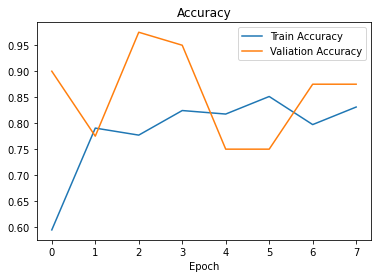

In [111]:
show_loss_acc(history_X)

In [77]:
model_X.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
flattening_layer (Flatten)   (None, 51200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               26214912  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 1026      
Total params: 47,077,418
Trainable params: 26,215,938
Non-trainable params: 20,861,480
______________________________________

In [78]:
for layer_number, layer in enumerate(model_X.layers[1].layers):
    print(layer.name, layer.trainable, layer.dtype_policy)

input_5 False <Policy "float32">
block1_conv1 False <Policy "float32">
block1_conv1_bn False <Policy "float32">
block1_conv1_act False <Policy "float32">
block1_conv2 False <Policy "float32">
block1_conv2_bn False <Policy "float32">
block1_conv2_act False <Policy "float32">
block2_sepconv1 False <Policy "float32">
block2_sepconv1_bn False <Policy "float32">
block2_sepconv2_act False <Policy "float32">
block2_sepconv2 False <Policy "float32">
block2_sepconv2_bn False <Policy "float32">
conv2d_207 False <Policy "float32">
block2_pool False <Policy "float32">
batch_normalization_203 False <Policy "float32">
add False <Policy "float32">
block3_sepconv1_act False <Policy "float32">
block3_sepconv1 False <Policy "float32">
block3_sepconv1_bn False <Policy "float32">
block3_sepconv2_act False <Policy "float32">
block3_sepconv2 False <Policy "float32">
block3_sepconv2_bn False <Policy "float32">
conv2d_208 False <Policy "float32">
block3_pool False <Policy "float32">
batch_normalization_204 Fa

In [79]:
model_X.evaluate(validation_creator)

3/3 [==============================] - 2s 460ms/step - loss: 0.1006 - accuracy: 0.9750


[0.10057444870471954, 0.9750000238418579]

In [80]:
pred_prob = model_X.predict(validation_creator)
pred_prob[:20]

array([[1.0000000e+00, 9.3328541e-05],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.7639138e-01],
       [1.0000000e+00, 9.9999678e-01],
       [1.0000000e+00, 9.9979556e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.4164625e-01],
       [1.0000000e+00, 9.9786985e-01],
       [1.0000000e+00, 2.2699228e-01],
       [1.0000000e+00, 9.9995947e-01],
       [1.0000000e+00, 1.1232516e-01],
       [1.0000000e+00, 9.5463347e-01],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9999964e-01],
       [1.0000000e+00, 1.2537539e-03],
       [1.0000000e+00, 7.2655082e-04],
       [1.0000000e+00, 9.9986660e-01],
       [1.0000000e+00, 4.2449087e-02],
       [1.0000000e+00, 9.9999976e-01],
       [1.0000000e+00, 1.6370973e-01]], dtype=float32)

In [81]:
y_pred_X = tf.argmax(pred_prob, axis=1)
y_pred_X

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [82]:
model_X_parameters = metrics_calc(true_label, y_pred_X)
model_X_parameters

{'accuracy': 0.975, 'precision': 1.0, 'recall': 0.95}

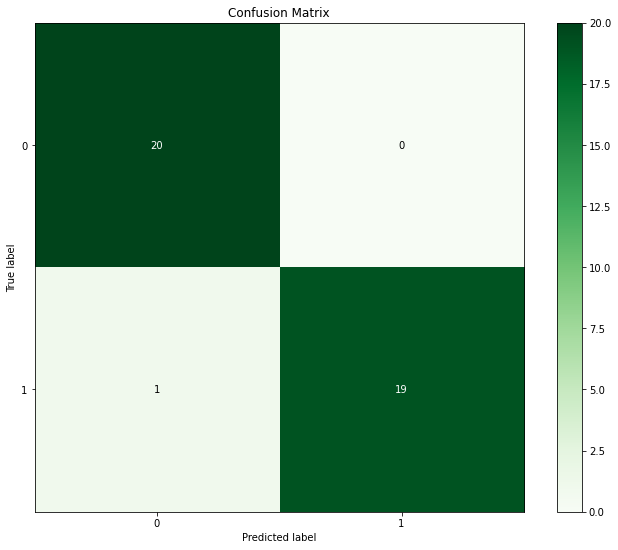

In [83]:
confusion_matrix(true_label, y_pred_X)

In [84]:
def custom_prediction_X(filepath):
    sample_image = cv2.imread(filepath)
    print('Actual shape of X-ray taken:',sample_image.shape)
    sample_image = cv2.resize(sample_image, (150,150), interpolation=cv2.INTER_CUBIC)
    plt.imshow(sample_image)
    test_image = np.expand_dims(sample_image, axis=0)
    print('Reshaped size of the X-ray got: ',test_image.shape)
    probability = model_X.predict(test_image)
    print('Probability of prediction: ',probability)
    print('Actual Class of the sample taken: PNEUMONIA')
    prediction_class = np.argmax(probability)
    #print('prediction class:',prediction_class)
    prediction_type = class_names[prediction_class]
    print("Predicted class of the sample taken: ", prediction_type)

C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
Actual shape of X-ray taken: (1800, 1750, 3)
Reshaped size of the X-ray got:  (1, 150, 150, 3)
Probability of prediction:  [[1. 1.]]
Actual Class of the sample taken: PNEUMONIA
Predicted class of the sample taken:  NORMAL


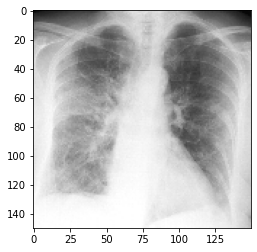

In [85]:
#Selecting a random test sample to show the prediction result 
import random
random = random.randint(0,len(test_pneumonia))
One_test_pneumonia = test_pneumonia[random]
filepath = "C:/Users/Ashwanth/xray_dataset_covid19/test/PNEUMONIA/"+One_test_pneumonia
print(filepath)
custom_prediction_X(filepath)

<h1>FINE TUNING - VGG16<h1>

In [86]:
model_VGG16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flattening_layer (Flatten)   (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________

In [87]:
for layer_number, layer in enumerate(model_VGG16.layers):
    print(layer_number, layer.name, layer.trainable, layer.dtype_policy)

0 input_layer True <Policy "float32">
1 vgg16 False <Policy "float32">
2 flattening_layer True <Policy "float32">
3 dense True <Policy "float32">
4 dropout True <Policy "float32">
5 dense_1 True <Policy "float32">


In [88]:
for layer_number, layer in enumerate(model_VGG16.layers[1].layers):
    print(layer_number, layer.name, layer.trainable, layer.dtype_policy)

0 input_1 False <Policy "float32">
1 block1_conv1 False <Policy "float32">
2 block1_conv2 False <Policy "float32">
3 block1_pool False <Policy "float32">
4 block2_conv1 False <Policy "float32">
5 block2_conv2 False <Policy "float32">
6 block2_pool False <Policy "float32">
7 block3_conv1 False <Policy "float32">
8 block3_conv2 False <Policy "float32">
9 block3_conv3 False <Policy "float32">
10 block3_pool False <Policy "float32">
11 block4_conv1 False <Policy "float32">
12 block4_conv2 False <Policy "float32">
13 block4_conv3 False <Policy "float32">
14 block4_pool False <Policy "float32">
15 block5_conv1 False <Policy "float32">
16 block5_conv2 False <Policy "float32">
17 block5_conv3 False <Policy "float32">
18 block5_pool False <Policy "float32">


In [89]:
base_model = model_VGG16.layers[1]
base_model.trainable = True

# now freeze all layers except these
for layer in base_model.layers[:-5]:
    layer.trainable = False

# compile the model again (Note: It's always better to compile again after every adjustments)
model_VGG16.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
                metrics=['accuracy'])

In [90]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable, layer.dtype_policy)

0 input_1 False <Policy "float32">
1 block1_conv1 False <Policy "float32">
2 block1_conv2 False <Policy "float32">
3 block1_pool False <Policy "float32">
4 block2_conv1 False <Policy "float32">
5 block2_conv2 False <Policy "float32">
6 block2_pool False <Policy "float32">
7 block3_conv1 False <Policy "float32">
8 block3_conv2 False <Policy "float32">
9 block3_conv3 False <Policy "float32">
10 block3_pool False <Policy "float32">
11 block4_conv1 False <Policy "float32">
12 block4_conv2 False <Policy "float32">
13 block4_conv3 False <Policy "float32">
14 block4_pool True <Policy "float32">
15 block5_conv1 True <Policy "float32">
16 block5_conv2 True <Policy "float32">
17 block5_conv3 True <Policy "float32">
18 block5_pool True <Policy "float32">


In [91]:
initial_epochs = 5 # our training would start from 5th epoch as we have already trained our model for 5 epochs
fine_tuning_epochs = initial_epochs + 10

# refit the model
history_fine_tuned = model_VGG16.fit(train_generator, epochs=fine_tuning_epochs, steps_per_epoch=len(train_generator),
                      validation_data = validation_creator, initial_epoch = history_VGG16.epoch[-1],
                      validation_steps = len(validation_creator),
                      callbacks=[create_tensorboard_callback("training_logs", "fine_tuned_VGG16"), model_cp,
                                 early_stopping_callback ])

storing the log files to : training_logs/fine_tuned_VGG16/211208-000437
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 1.3601 - accuracy: 0.7905 - val_loss: 0.2062 - val_accuracy: 0.9250
Epoch 6/15
8/8 [==============================] - 14s 2s/step - loss: 0.5034 - accuracy: 0.7838 - val_loss: 0.2162 - val_accuracy: 0.9000
Epoch 7/15
8/8 [==============================] - 15s 2s/step - loss: 0.2815 - accuracy: 0.8919 - val_loss: 0.2168 - val_accuracy: 0.9000
Epoch 8/15
8/8 [==============================] - 15s 2s/step - loss: 0.3801 - accuracy: 0.8649 - val_loss: 0.2768 - val_accuracy: 0.9000
Epoch 9/15
8/8 [==============================] - 15s 2s/step - loss: 0.1883 - accuracy: 0.9459 - val_loss: 0.1560 - val_accuracy: 0.9000
Epoch 10/15
8/8 [==============================] - 15s 2s/step - loss: 0.3998 - accuracy: 0.8108 - val_loss: 0.1842 - val_accuracy: 0.9500
Epoch 11/15
8/8 [==============================] - 15s 2s/step - loss: 0.1945 - accuracy: 0.9257 - 

In [92]:
pred_prob = model_VGG16.predict(validation_creator)
pred_prob[:10]

array([[0.8244877 , 0.03348172],
       [0.3707043 , 0.6955506 ],
       [0.911522  , 0.00440702],
       [0.7252709 , 0.11565563],
       [0.5890292 , 0.30342937],
       [0.40614593, 0.61135274],
       [0.6856116 , 0.18519562],
       [0.7786897 , 0.0438824 ],
       [0.9224992 , 0.00445735],
       [0.72375697, 0.10550234]], dtype=float32)

In [93]:
y_pred_FT = tf.argmax(pred_prob, axis=1)
y_pred_FT

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [94]:
model_FT_parameters = metrics_calc(true_label, y_pred_FT)
model_FT_parameters

{'accuracy': 0.9, 'precision': 0.8636364, 'recall': 0.95}

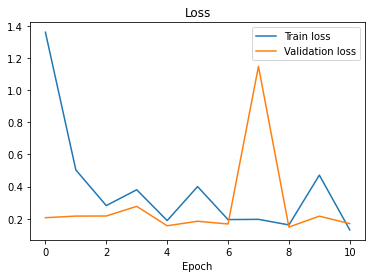

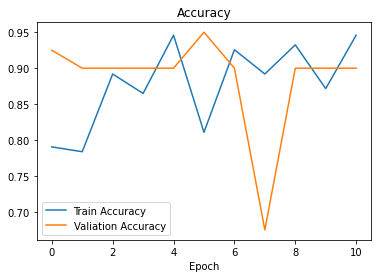

In [95]:
# let us check how the loss and accuracy curves looks when visualized
show_loss_acc(history_fine_tuned)

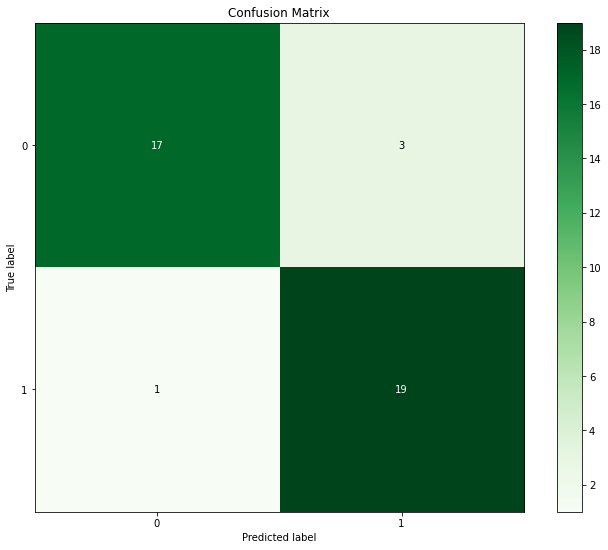

In [96]:
confusion_matrix(true_label, y_pred_FT)

<h1>Calculation of F1 score<h1>

In [97]:
def calculate_F1_score(precision, recall): 
    F1 = ((precision*recall)/(precision+recall)) * 2
    return F1

In [98]:
precision_CNN = model_CNN_param['precision']
recall_CNN = model_CNN_param['recall']

In [99]:
F1_model_CNN = calculate_F1_score(precision_CNN, recall_CNN) 
F1_model_CNN

1.0

<h1>Exploratory Data Analysis<h1>

In [100]:
VGG16_acc = model_VGG16_param['accuracy'] 
CNN_acc = model_CNN_param['accuracy']
NNL_acc = model_NNL_parameters['accuracy']
MN_acc = model_MN_parameters['accuracy']
IRN_acc = model_IRN_parameters['accuracy']
X_acc = model_X_parameters['accuracy']
FT_acc = model_FT_parameters['accuracy']

accuracy_collection = { "VGG16": VGG16_acc, 
                 "CNN": CNN_acc, 
                 "NasNetLarge": NNL_acc, 
                 "InceptionResNetV2": IRN_acc,
                 "MobileNet": MN_acc, 
                 "Xception": X_acc,
                 "VGG16_fine_tuned":FT_acc
                 }

In [101]:
accuracy_collection

{'VGG16': 0.975,
 'CNN': 1.0,
 'NasNetLarge': 0.975,
 'InceptionResNetV2': 0.85,
 'MobileNet': 1.0,
 'Xception': 0.975,
 'VGG16_fine_tuned': 0.9}

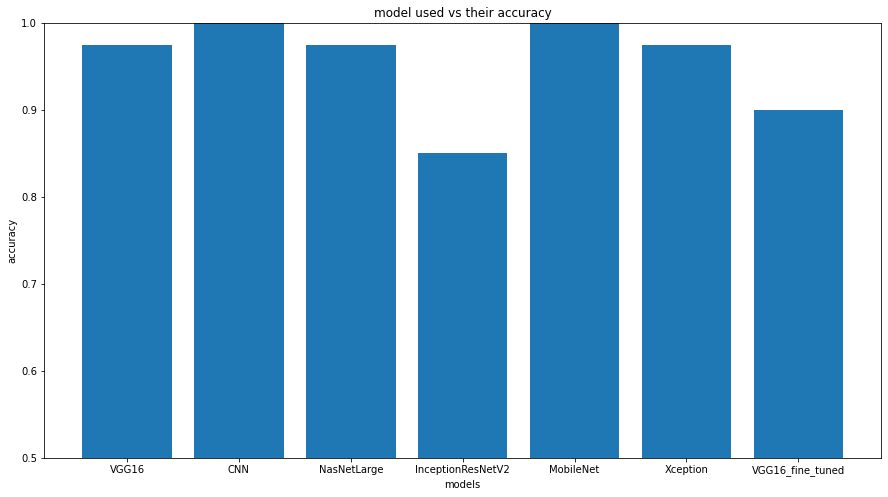

In [102]:
model_name = accuracy_collection.keys()
acc = accuracy_collection.values()

plt.figure(figsize=(15,8))
plt.bar(model_name, acc)
plt.ylim((0.5,1))
plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("model used vs their accuracy")
plt.show()

In [103]:
VGG16_pre = model_VGG16_param['precision'] 
CNN_pre = model_CNN_param['precision']
NNL_pre = model_NNL_parameters['precision']
MN_pre = model_MN_parameters['precision']
IRN_pre = model_IRN_parameters['precision']
X_pre = model_X_parameters['precision']
FT_pre = model_FT_parameters['precision']


precision_collection = { "VGG16": VGG16_pre, 
                 "CNN": CNN_pre, 
                 "NasNetLarge": NNL_pre, 
                 "InceptionResNetV2": IRN_pre,
                 "MobileNet": MN_pre, 
                 "Xception": X_pre,
                 "VGG16_fine_tuned":FT_pre
                 }

precision_collection 

{'VGG16': 1.0,
 'CNN': 1.0,
 'NasNetLarge': 1.0,
 'InceptionResNetV2': 1.0,
 'MobileNet': 1.0,
 'Xception': 1.0,
 'VGG16_fine_tuned': 0.8636364}

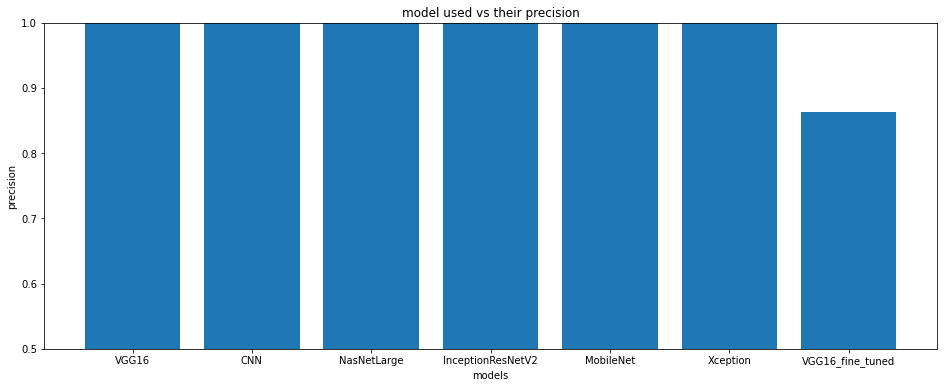

In [114]:
#model name can be retrieved from precision_collection.keys()
pre = precision_collection.values()
plt.figure(figsize=(16,6))
plt.bar(model_name, pre)
plt.ylim((0.5,1))
plt.xlabel("models")
plt.ylabel("precision")
plt.title("model used vs their precision")
plt.show()

In [105]:
VGG16_recall = model_VGG16_param['recall'] 
CNN_recall = model_CNN_param['recall']
NNL_recall = model_NNL_parameters['recall']
MN_recall = model_MN_parameters['recall']
IRN_recall = model_IRN_parameters['recall']
X_recall = model_X_parameters['recall']
FT_recall = model_FT_parameters['recall']

recall_collection = { "VGG16": VGG16_recall, 
                 "CNN": CNN_recall, 
                 "NasNetLarge": NNL_recall, 
                 "InceptionResNetV2": IRN_recall,
                 "MobileNet": MN_recall, 
                 "Xception": X_recall,
                 "VGG16_fine_tuned":FT_recall
                 }

recall_collection 

{'VGG16': 0.95,
 'CNN': 1.0,
 'NasNetLarge': 0.95,
 'InceptionResNetV2': 0.7,
 'MobileNet': 1.0,
 'Xception': 0.95,
 'VGG16_fine_tuned': 0.95}

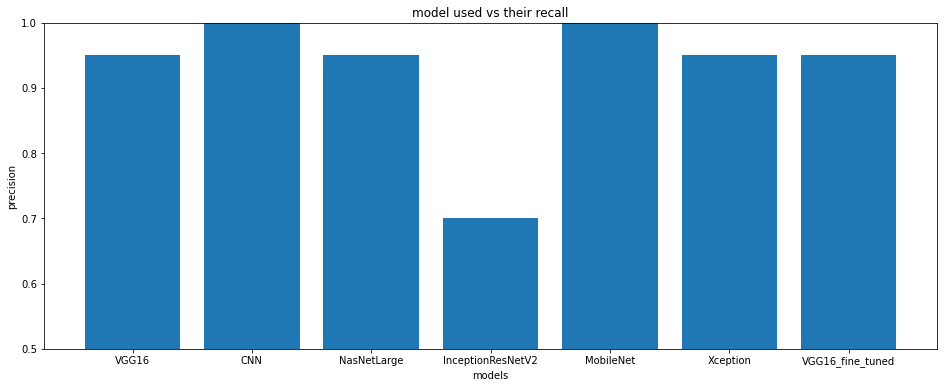

In [115]:
re = recall_collection.values()
plt.figure(figsize=(16,6))
plt.bar(model_name, re)
plt.ylim((0.5,1))
plt.xlabel("models")
plt.ylabel("precision")
plt.title("model used vs their recall")
plt.show()

In [116]:
accuracy = [VGG16_acc, CNN_acc, NNL_acc, MN_acc, IRN_acc, X_acc, FT_acc]
precision = [VGG16_pre, CNN_pre, NNL_pre, MN_pre, IRN_pre, X_pre, FT_pre]
recall = [VGG16_recall, CNN_recall, NNL_recall, MN_recall, IRN_recall, X_recall, FT_recall]
models = ["VGG16", "CNN", "NasNetLarge", "MobileNet", "InceptionResNetV2", "Xception", "VGG_fine_tuned"]

f1score = []
for i in range(0, 7):
    f1score.append(calculate_F1_score(accuracy[i], recall[i]))

f1score

[0.9623377323150635,
 1.0,
 0.9623377323150635,
 1.0,
 0.7677419781684875,
 0.9623377323150635,
 0.9243243336677551]

In [117]:
import pandas as pd
dataframe = pd.DataFrame({
                         "accuracy": accuracy,
                          "f1_score": f1score,
                         "recall": recall,
                         "precision": precision}, index=models)

dataframe

,accuracy,f1_score,recall,precision
VGG16,0.975,0.962338,0.95,1.000000
CNN,1.000,1.000000,1.00,1.000000
NasNetLarge,0.975,0.962338,0.95,1.000000
MobileNet,1.000,1.000000,1.00,1.000000
InceptionResNetV2,0.850,0.767742,0.70,1.000000
Xception,0.975,0.962338,0.95,1.000000
VGG_fine_tuned,0.900,0.924324,0.95,0.863636


Text(0, 0.5, 'validation_accuracy')

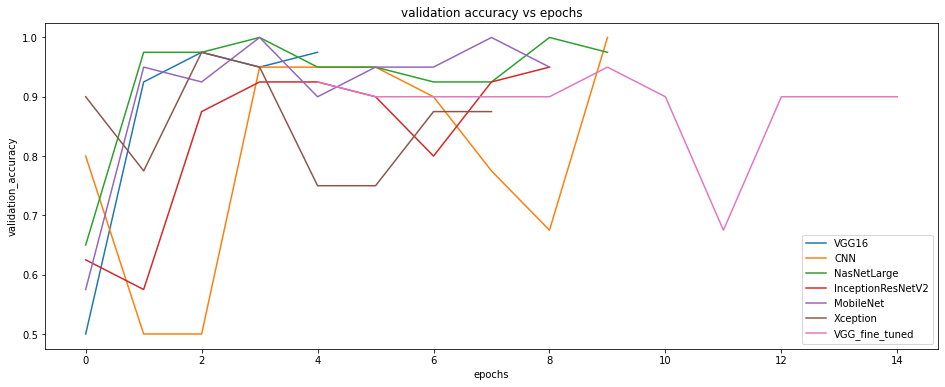

In [118]:
plt.figure(figsize=(16,6))
plt.plot(history_VGG16.epoch, history_VGG16.history['val_accuracy'], label="VGG16")
plt.plot(history_CNN.epoch, history_CNN.history['val_accuracy'], label="CNN")
plt.plot(history_NNL.epoch, history_NNL.history['val_accuracy'], label="NasNetLarge")
plt.plot(history_IRN.epoch, history_IRN.history['val_accuracy'], label="InceptionResNetV2")
plt.plot(history_MN.epoch, history_MN.history['val_accuracy'], label="MobileNet")
plt.plot(history_X.epoch, history_X.history['val_accuracy'], label="Xception")
plt.plot(history_fine_tuned.epoch, history_fine_tuned.history['val_accuracy'], label="VGG_fine_tuned")
plt.legend()
plt.title('validation accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('validation_accuracy')

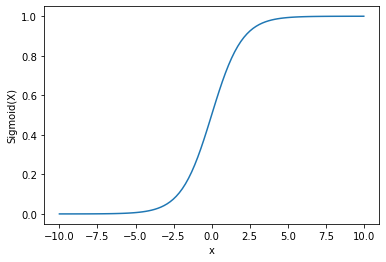

In [109]:
#Visualizing Sigmoid activation function for the purpose of Report

import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

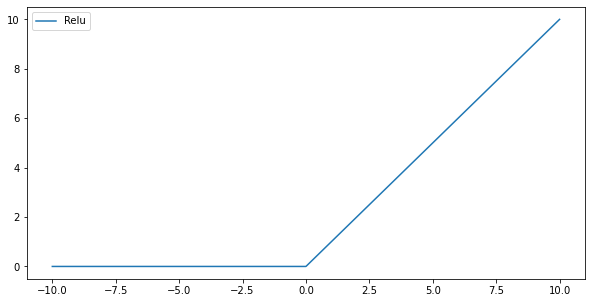

In [110]:
#Visualizing relu activation function for the purpose of Report

x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()